In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Final_df = Final_df.drop_duplicates(subset=['question'])

In [3]:
academic = pd.read_csv('CSV/academic.csv')
advising = pd.read_csv('CSV/advising.csv')
atis = pd.read_csv('CSV/atis.csv')
geo = pd.read_csv('CSV/geo.csv')
imdb = pd.read_csv('CSV/imdb.csv')
restaurants = pd.read_csv('CSV/restaurants.csv')
scholar = pd.read_csv('CSV/scholar.csv')
spider = pd.read_csv('CSV/spider.csv')
wikisql = pd.read_csv('CSV/wikisql.csv')
yelp = pd.read_csv('CSV/yelp.csv')
medical = pd.read_csv("CSV/data_medical_nodubl.csv")
df_tsv = pd.read_csv("CSV/all_questions.csv")
data_list = [academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, df_tsv]
names = ['academic', 'advising', 'atis', 'geo', 'imdb', 'restaurants', 'scholar', 'spider', 'wikisql', 'yelp', 'df_tsv']

In [4]:
medical = medical.drop_duplicates(subset=['question'])
medical.to_csv('CSV/data_medical_nodubl.csv')

In [5]:
medical

,Unnamed: 0,Unnamed: 0.1,question,sql,source
0,0,0,find the number of patients who prefer haitian...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
1,1,1,give me the number of patients whose religion ...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
2,2,2,count the number of patients whose ethnicity i...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
3,3,3,how many patients are diagnosed with primary d...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
4,4,4,what number of patients were primarily diagnos...,"SELECT COUNT ( DISTINCT DEMOGRAPHIC.""SUBJECT_I...",medical
...,...,...,...,...,...
9992,32505495,995,find the average age of patients under the age...,"SELECT AVG ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical
9993,32505496,996,what is the average age of patients in or abov...,"SELECT AVG ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical
9994,32505497,997,calculate the average age of patients admitted...,"SELECT AVG ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical
9995,32505498,998,what is maximum age of patients who have staye...,"SELECT MAX ( DEMOGRAPHIC.""AGE"" ) FROM DEMOGRAP...",medical


In [6]:
question = medical.question[899]

In [7]:
def description(data, name):
    data_info = pd.DataFrame()
    sql = data['sql'].str.upper().str.split()
    question = data['question'].str.upper().str.split()
    data['sqlSplit'] = sql
    data['questionSplit'] = question
    data['questionUniqueCounter'] = question.apply(set).apply(len)
    data['sqlUniqueCounter'] = sql.apply(set).apply(len)
    data_info['mean_len_sql'] = [data['sqlUniqueCounter'].mean()]
    data_info['median_len_sql'] = [data['sqlUniqueCounter'].median()]
    data_info['std_len_sql'] = [data['sqlUniqueCounter'].std()]
    
    data_info['mean_len_question'] = [data['questionUniqueCounter'].mean()]
    data_info['median_len_question'] = [data['questionUniqueCounter'].median()]
    data_info['std_len_question'] = [data['questionUniqueCounter'].std()]
    data_info['source'] = name
    return data_info

In [8]:
def number_of_keyWords(data,words,name):
    data_keywords = pd.DataFrame()
    for word in words:
        data[word] = data.sql.str.count(word)
        data_keywords[word] = [data[word].sum()]
    data_keywords['source'] = name
    return data_keywords

In [9]:
words = ['SELECT','WHERE','FROM','JOIN','LIKE','GROUP BY','COUNT','DISTINCT','MIN','MAX','AVG','ORDER BY']

In [10]:
result_info = pd.DataFrame()
for i,data in enumerate(data_list):
    res = description(data, names[i])
    result_info = pd.concat([res,result_info], axis=0, join='outer', ignore_index=False)

In [11]:
result = pd.DataFrame()
for i,data in enumerate(data_list):
    data_keywords = number_of_keyWords(data,words,names[i])
    result = pd.concat([result,data_keywords], axis=0, join='outer', ignore_index=False)


In [12]:
description_df = result_info.copy()
keyword_nums_df = result.copy()

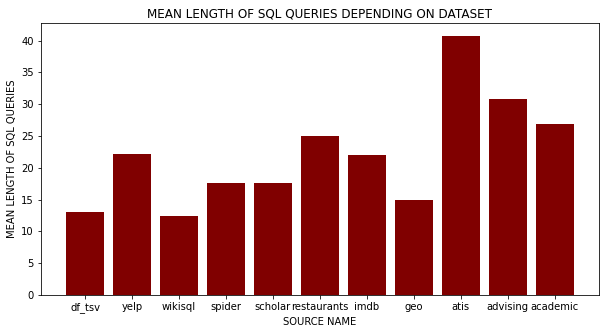

In [13]:
fig = plt.figure(figsize = (10, 5))
plt.bar(description_df['source'], description_df['mean_len_sql'], color ='maroon',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF SQL QUERIES")
plt.title("MEAN LENGTH OF SQL QUERIES DEPENDING ON DATASET")
plt.show()

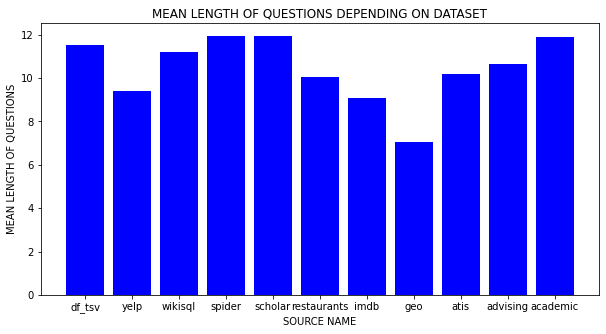

In [14]:
fig = plt.figure(figsize = (10, 5))
plt.bar(description_df['source'], description_df['mean_len_question'], color ='blue',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF QUESTIONS")
plt.title("MEAN LENGTH OF QUESTIONS DEPENDING ON DATASET")
plt.show()

In [31]:
final_df = pd.concat([academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv], axis=0, join='outer', ignore_index=False)


In [33]:
final_df = final_df.drop_duplicates(subset=['question'])

In [22]:
grouped = final_df.groupby('source').count()
grouped['sql']

source
academic          185
advising         4366
atis             3827
cosql_all           8
geography         607
imdb              125
restaurants       125
spider           9342
test_spark         20
test_spider      1019
train_others     1375
train_sparc        84
train_spider     6926
wikisql         75430
yelp              122
Name: sql, dtype: int64

In [23]:
keyword_nums_df

,SELECT,WHERE,FROM,JOIN,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,source
0,193,182,193,0,0,38,85,79,0,0,0,22,academic
0,5288,5254,5288,3558,3182,92,961,3859,326,76,10,269,advising
0,6920,6891,12156,0,16,9,86,5285,544,150,0,0,atis
0,1424,1100,1424,4,0,74,150,67,91,233,2,37,geo
0,132,131,132,0,0,6,33,33,0,1,0,10,imdb
0,471,471,471,0,0,0,45,0,0,69,0,0,restaurants
0,11370,6362,11405,6677,275,2247,6075,1624,525,552,619,2047,scholar
0,11370,6362,11405,6677,275,2247,6075,1624,525,552,619,2047,spider
0,80672,80050,81026,145,0,0,10138,0,5715,4762,3421,0,wikisql
0,128,127,128,0,4,11,61,41,0,0,4,10,yelp


In [28]:
medical_desc = description(medical, 'medical')
medical_desc

,mean_len_sql,median_len_sql,std_len_sql,mean_len_question,median_len_question,std_len_question,source
0,19.36621,21.0,5.559928,14.3339,14.0,3.65301,medical


In [30]:
medical_kw = number_of_keyWords(medical, words, 'medical')
medical_kw

,SELECT,WHERE,FROM,JOIN,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,source
0,9997,9997,10088,7448,0,0,7686,7719,265,254,234,0,medical


In [24]:
final_df.isna().sum()

question                     0
source                       0
sql                          0
sqlSplit                     0
questionSplit                0
questionUniqueCounter        0
sqlUniqueCounter             0
SELECT                       0
WHERE                        0
FROM                         0
JOIN                         0
LIKE                         0
GROUP BY                     0
COUNT                        0
DISTINCT                     0
MIN                          0
MAX                          0
AVG                          0
ORDER BY                     0
Unnamed: 0               94129
dtype: int64

- keywords counts on final data not to have dublicates
- add cosql and others
- domains of datas/complexity
- date columns
- csv info
- scraping